In [1]:
#!pip install tensorflow


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.config.list_physical_devices("GPU")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt

2025-04-07 12:51:20.860426: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744055480.872876 2586395 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744055480.876693 2586395 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744055480.887657 2586395 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744055480.887668 2586395 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744055480.887670 2586395 computation_placer.cc:177] computation placer alr

In [9]:
stars['uJ378'] = stars.u - stars.J378
stars['uJ395'] = stars.u - stars.J395
stars['uJ410'] = stars.u - stars.J410
stars['uJ430'] = stars.u - stars.J430
stars['ug'] = stars.u - stars.g
stars['uJ515'] = stars.u - stars.J515
stars['ur'] = stars.u - stars.r
stars['uJ660'] = stars.u - stars.J660

stars['uz'] = stars.u - stars.z
stars['ui'] = stars.u - stars.i

stars['J378J395'] = stars.J378 - stars.J395
stars['J378J410'] = stars.J378 - stars.J410
stars['J378J430'] = stars.J378 - stars.J430
stars['J378g'] = stars.J378 - stars.g
stars['J378J515'] = stars.J378 - stars.J515
stars['J378r'] = stars.J378 - stars.r
stars['J378J660'] = stars.J378 - stars.J660

stars['J378z'] = stars.J378 - stars.z
stars['J378i'] = stars.J378 - stars.i

stars['J395J410'] = stars.J395 - stars.J410
stars['J395J430'] = stars.J395 - stars.J430
stars['J395g'] = stars.J395 - stars.g
stars['J395J515'] = stars.J395 - stars.J515
stars['J395r'] = stars.J395 - stars.r
stars['J395J660'] = stars.J395 - stars.J660

stars['J395z'] = stars.J395 - stars.z
stars['J395i'] = stars.J395 - stars.i

stars['J410J430'] = stars.J410 - stars.J430
stars['J410g'] = stars.J410 - stars.g
stars['J410J515'] = stars.J410 - stars.J515
stars['J410r'] = stars.J410 - stars.r
stars['J410J660'] = stars.J410 - stars.J660

stars['J410z'] = stars.J410 - stars.z
stars['J410i'] = stars.J410 - stars.i

stars['J430g'] = stars.J430 - stars.g
stars['J430J515'] = stars.J430 - stars.J515
stars['J430r'] = stars.J430 - stars.r
stars['J430J660'] = stars.J430 - stars.J660

stars['J430z'] = stars.J430 - stars.z
stars['J430i'] = stars.J430 - stars.i

stars['gJ515'] = stars.g - stars.J515
stars['gr'] = stars.g - stars.r
stars['gJ660'] = stars.g - stars.J660

stars['gz'] = stars.g - stars.z
stars['gi'] = stars.g - stars.i

stars['J515r'] = stars.J515 - stars.r
stars['J515J660'] = stars.J515 - stars.J660

stars['J515z'] = stars.J515 - stars.z
stars['J515i'] = stars.J515 - stars.i

stars['rJ660'] = stars.r - stars.J660

stars['rz'] = stars.r - stars.z
stars['ri'] = stars.r - stars.i


stars['J660z'] = stars.J660 - stars.z
stars['J660i'] = stars.J660 - stars.i



stars['zi'] = stars.z - stars.i

In [10]:
X = stars[['uJ378','uJ395','uJ410','uJ430','ug','uJ515','ur','uJ660','uz','ui',
           'J378J395','J378J410','J378J430','J378g','J378J515','J378r','J378J660','J378z','J378i',
           'J395J410','J395J430','J395g','J395J515','J395r','J395J660','J395z','J395i',
           'J410J430','J410g','J410J515','J410r','J410J660','J410z','J410i',
           'J430g','J430J515','J430r','J430J660','J430z','J430i',
           'gJ515','gr','gJ660','gz','gi',
           'J515r','J515J660','J515z','J515i',
           'rJ660','rz','ri','J660z','J660i',
           'zi']].values

Y = stars.feh.values

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.05, random_state=0)

In [12]:
Y_train

array([-0.22, -0.85, -0.4 , ..., -1.35, -0.14, -0.68])

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)


In [14]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=32, kernel_initializer = 'uniform', activation='relu'))
ann.add(tf.keras.layers.Dense(units=32, kernel_initializer = 'uniform', activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, kernel_initializer = 'uniform', activation='linear'))

ann.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [15]:
ann.fit(X_train,Y_train, batch_size=64, epochs=500)

Epoch 1/500
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 2s 716us/step - accuracy: 0.0050 - loss: 0.2017
Epoch 2/500
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.0049 - loss: 0.0907
Epoch 3/500
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.0047 - loss: 0.0880
Epoch 4/500
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.0048 - loss: 0.0811
Epoch 5/500
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.0045 - loss: 0.0794
Epoch 6/500
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.0052 - loss: 0.0781
Epoch 7/500
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.0045 - loss: 0.0769
Epoch 8/500
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.0043 - loss: 0.0752
Epoch 9/500
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.0050 - loss: 0.0767
Epoch 10/500
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.0049 - loss: 0.0735
Epoch 11/500
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.0047 - loss: 0.07

In [16]:
ann.save("FEHNetwork.keras")
import joblib
joblib.dump(sc, "scaler_feh.pkl")

['scaler_feh.pkl']

In [17]:
Y_pred = ann.predict(X_test)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step


In [18]:
Y_pred[:,0]-Y_test

array([ 0.7568292 , -0.01042463, -0.21800827, ..., -0.12087844,
       -0.08828701,  0.08183142])

In [19]:
array = Y_pred[:,0]-Y_test

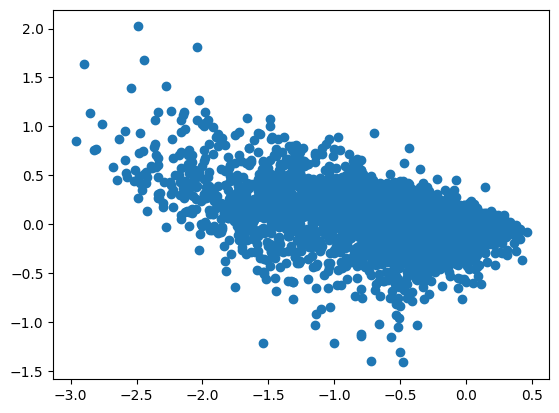

In [20]:
plt.scatter(Y_test,Y_pred[:,0] - Y_test)